# Lab 4. Plotting with Seaborn I

### Data visualization is as much a part of the data processing step as the data presentation step. It is much easier to compare values when they are plotted than numeric values. By visualizing data we are able to get a better intuitive sense of the data than would be possible by looking at tables of values alone. Additionally, visualizations can bring to light hidden patterns in data, that you, the analyst, can exploit for model selection.

### Python has many libraries for creating visualizations, but the main one for data analysis (and other purposes) is matplotlib. The matplotlib library can be a little tricky to learn at first, but thankfully, pandas has its own wrappers around some of the matplotlib functionality, allowing us to create many different types of visualizations without needing to write a single line with matplotlib (or, at least, very few). For more complicated plot types that aren't built into pandas or matplotlib, we have the seaborn library, which we will discuss in the next chapter. 

## This session will cover:
1. Plotting with Pandas

## 0. Let's load some libraries


In [1]:
import pandas as pd

In [2]:
### The matplotlib package is rather large since it encompasses quite a bit of functionality. Fortunately for us, for most of our plotting tasks, all we need is the pyplot module, which provides a MATLAB-like plotting framework
import matplotlib.pyplot as plt


## 1. Let's load some data

### 1.1. Earthquakes.
#### The earthquakes.csv file contains earthquake data collected from the United States Geological Survey (USGS) API (https://earthquake.usgs.gov/fdsnws/event/1/) for September 18, 2018 through October 13, 2018. 
#### For each earthquake, we have the value of the magnitude (the mag column), the scale it was measured on (the magType column), when (the time column) and where (the place column) it occurred, and the parsed_place column for the state or country where the earthquake occurred

In [10]:
# load earthquakes dataset
earthquakes = pd.read_csv('../data/earthquakes.csv')

In [11]:
earthquakes.head()

mag magType           time                  place  tsunami parsed_place
0  1.35      ml  1539475168010  9km NE of Aguanga, CA        0   California
1  1.29      ml  1539475129610  9km NE of Aguanga, CA        0   California
2  3.42      ml  1539475062610  8km NE of Aguanga, CA        0   California
3  0.44      ml  1539474978070  9km NE of Aguanga, CA        0   California
4  2.16      md  1539474716050  10km NW of Avenal, CA        0   California

In [16]:
earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9332 entries, 0 to 9331
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mag           9331 non-null   float64
 1   magType       9331 non-null   object 
 2   time          9332 non-null   int64  
 3   place         9332 non-null   object 
 4   tsunami       9332 non-null   int64  
 5   parsed_place  9332 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 437.6+ KB


In [17]:
earthquakes.groupby('magType').count()

mag  time  place  tsunami  parsed_place
magType                                          
mb        601   601    601      601           601
mb_lg      30    30     30       30            30
md       1796  1796   1796     1796          1796
mh         12    12     12       12            12
ml       6803  6803   6803     6803          6803
ms_20       1     1      1        1             1
mw          4     4      4        4             4
mwb         2     2      2        2             2
mwr        14    14     14       14            14
mww        68    68     68       68            68

In [18]:
earthquakes.groupby('tsunami').count()

mag  magType  time  place  parsed_place
tsunami                                          
0        9270     9270  9271   9271          9271
1          61       61    61     61            61

### 1.2. COVID-19.
#### In the covid19_cases.csv file, we have an export from the daily number of new reported cases of COVID-19 by country worldwide dataset provided by the European Centre for Disease Prevention and Control (ECDC), which can be found at https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide. 
#### For scripted or automated collection of this data, the ECDC makes the current day's CSV file available via https://opendata.ecdc.europa.eu/covid19/casedistribution/csv. T
#### The snapshot we will be using was collected on September 19, 2020 and contains the number of new COVID-19 cases per country from December 31, 2019 through September 18, 2020, with partial data for September 19, 2020. For this chapter, we will look at the 8-month span from January 18, 2020 through September 18, 2020.



In [8]:
covid = pd.read_csv('../data/covid19_cases.csv').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').replace(
    'United_States_of_America', 'USA'
).sort_index()['2020-01-18':'2020-09-18']

In [9]:
covid.head()

dateRep  day  month  year  cases  deaths  \
date                                                      
2020-01-18  18/01/2020   18      1  2020      0       0   
2020-01-18  18/01/2020   18      1  2020      0       0   
2020-01-18  18/01/2020   18      1  2020      0       0   
2020-01-18  18/01/2020   18      1  2020      0       0   
2020-01-18  18/01/2020   18      1  2020      0       0   

           countriesAndTerritories geoId countryterritoryCode  popData2019  \
date                                                                         
2020-01-18                 Croatia    HR                  HRV    4076246.0   
2020-01-18                  Greece    EL                  GRC   10724599.0   
2020-01-18          United_Kingdom    UK                  GBR   66647112.0   
2020-01-18              Azerbaijan    AZ                  AZE   10047719.0   
2020-01-18                 Bahrain    BH                  BHR    1641164.0   

           continentExp  \
date                      
2020-01-18       Europe   
2020-01-18       Europe   
2020-01-18       Europe   
2020-01-18       Europe   
2020-01-18         Asia   

            Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
date                                                                    
2020-01-18                                                0.0           
2020-01-18                                                0.0           
2020-01-18                                                0.0           
2020-01-18                                                0.0           
2020-01-18                                                0.0

In [20]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42304 entries, 2020-01-18 to 2020-09-18
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   dateRep                                                     42304 non-null  object 
 1   day                                                         42304 non-null  int64  
 2   month                                                       42304 non-null  int64  
 3   year                                                        42304 non-null  int64  
 4   cases                                                       42304 non-null  int64  
 5   deaths                                                      42304 non-null  int64  
 6   countriesAndTerritories                                     42304 non-null  object 
 7   geoId                                                       42116 no

In [21]:
covid.describe()

day         month     year         cases        deaths  \
count  42304.000000  42304.000000  42304.0  42304.000000  42304.000000   
mean      15.785079      5.716623   2020.0    714.620461     22.380271   
std        8.793303      2.079677      0.0   4387.708253    128.195332   
min        1.000000      1.000000   2020.0  -8261.000000  -1918.000000   
25%        8.000000      4.000000   2020.0      0.000000      0.000000   
50%       16.000000      6.000000   2020.0     11.000000      0.000000   
75%       23.000000      7.000000   2020.0    160.000000      3.000000   
max       31.000000      9.000000   2020.0  97894.000000   4928.000000   

        popData2019  \
count  4.225800e+04   
mean   4.163560e+07   
std    1.547424e+08   
min    8.150000e+02   
25%    1.324820e+06   
50%    7.813207e+06   
75%    2.860872e+07   
max    1.433784e+09   

       Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
count                                       40399.000000           
mean                                           33.114790           
std                                            76.029934           
min                                          -147.419587           
25%                                             0.406767           
50%                                             4.667643           
75%                                            26.774018           
max                                          1058.225943

In [28]:
covid.groupby('countriesAndTerritories').count()

dateRep  day  month  year  cases  deaths  geoId  \
countriesAndTerritories                                                    
Afghanistan                  235  235    235   235    235     235    235   
Albania                      194  194    194   194    194     194    194   
Algeria                      240  240    240   240    240     240    240   
Andorra                      189  189    189   189    189     189    189   
Angola                       181  181    181   181    181     181    181   
...                          ...  ...    ...   ...    ...     ...    ...   
Vietnam                      241  241    241   241    241     241    241   
Western_Sahara               146  146    146   146    146     146    146   
Yemen                        162  162    162   162    162     162    162   
Zambia                       184  184    184   184    184     184    184   
Zimbabwe                     182  182    182   182    182     182    182   

                         countryterritoryCode  popData2019  continentExp  \
countriesAndTerritories                                                    
Afghanistan                               235          235           235   
Albania                                   194          194           194   
Algeria                                   240          240           240   
Andorra                                   189          189           189   
Angola                                    181          181           181   
...                                       ...          ...           ...   
Vietnam                                   241          241           241   
Western_Sahara                            146          146           146   
Yemen                                     162          162           162   
Zambia                                    184          184           184   
Zimbabwe                                  182          182           182   

                         Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
countriesAndTerritories                                                              
Afghanistan                                                            235           
Albania                                                                181           
Algeria                                                                240           
Andorra                                                                176           
Angola                                                                 168           
...                                                                    ...           
Vietnam                                                                241           
Western_Sahara                                                         133           
Yemen                                                                  149           
Zambia                                                                 171           
Zimbabwe                                                               169           

[210 rows x 11 columns]

## 2. Let's do some plotting (univariate, bivariate)

## 2.1. Histograms
### Let's compute the empirical distribution of COVID-19 cases and deaths

In [22]:
covid.head()

dateRep  day  month  year  cases  deaths  \
date                                                      
2020-01-18  18/01/2020   18      1  2020      0       0   
2020-01-18  18/01/2020   18      1  2020      0       0   
2020-01-18  18/01/2020   18      1  2020      0       0   
2020-01-18  18/01/2020   18      1  2020      0       0   
2020-01-18  18/01/2020   18      1  2020      0       0   

           countriesAndTerritories geoId countryterritoryCode  popData2019  \
date                                                                         
2020-01-18                 Croatia    HR                  HRV    4076246.0   
2020-01-18                  Greece    EL                  GRC   10724599.0   
2020-01-18          United_Kingdom    UK                  GBR   66647112.0   
2020-01-18              Azerbaijan    AZ                  AZE   10047719.0   
2020-01-18                 Bahrain    BH                  BHR    1641164.0   

           continentExp  \
date                      
2020-01-18       Europe   
2020-01-18       Europe   
2020-01-18       Europe   
2020-01-18       Europe   
2020-01-18         Asia   

            Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
date                                                                    
2020-01-18                                                0.0           
2020-01-18                                                0.0           
2020-01-18                                                0.0           
2020-01-18                                                0.0           
2020-01-18                                                0.0

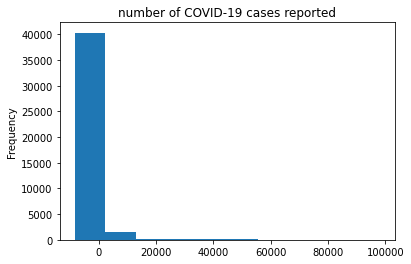

In [38]:
covid['cases'].plot(kind='hist', title='number of COVID-19 cases reported')

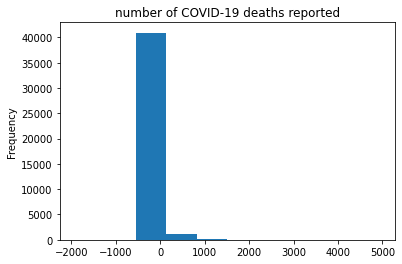

In [39]:
covid['deaths'].plot(kind='hist', title='number of COVID-19 deaths reported')

### Is there any difference between Germany and Afghanistan ?

In [32]:
germanyFilter=covid['countriesAndTerritories']=='Germany'

afghanistanFilter=covid['countriesAndTerritories']=='Afghanistan'

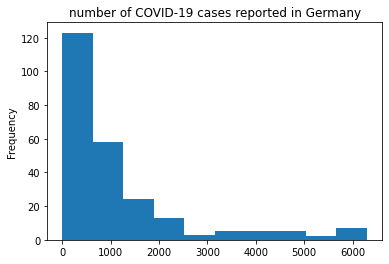

In [40]:
covid[germanyFilter]['cases'].plot(kind='hist', title='number of COVID-19 cases reported in Germany')

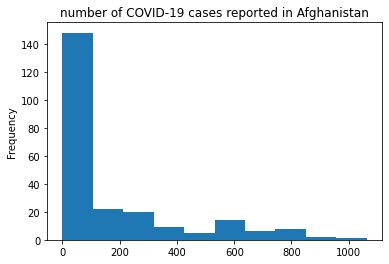

In [41]:
covid[afghanistanFilter]['cases'].plot(kind='hist', title='number of COVID-19 cases reported in Afghanistan')

In [6]:
tips['total_bill'].describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

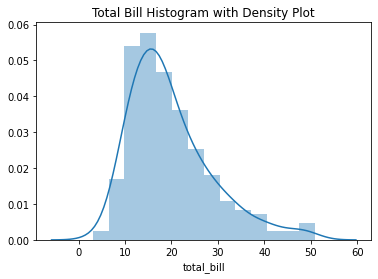

In [7]:
ax = sns.distplot(tips['total_bill'])
ax.set_title('Total Bill Histogram with Density Plot');

## The histogram reveals that 20 dollars is the usual total_bill (mean 19.78)

## 2.2. Bar Plots

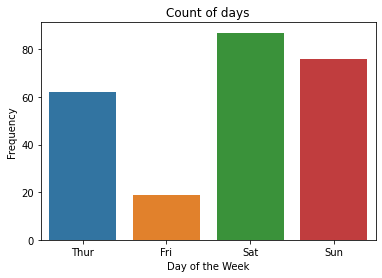

In [8]:
ax = sns.countplot('day', data=tips)
ax.set_title('Count of days');
ax.set_xlabel('Day of the Week');
ax.set_ylabel('Frequency');

## we observe from the previous figure that people tend to dine outside mostly on weekends

## 2.3. ScatterPlot

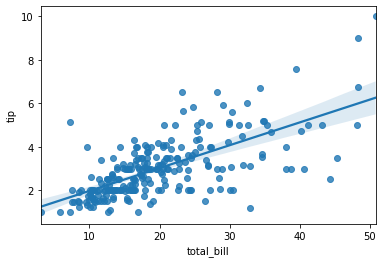

In [9]:
x = sns.regplot(x='total_bill', y='tip', data=tips)
ax.set_title('Scatterplot of Total Bill and Tip');
ax.set_xlabel('Total Bill');
ax.set_ylabel('Tip');

## we observe some relationship between the total amount paid and the tip received, but also increasing variability

## 2.4. Density Plot

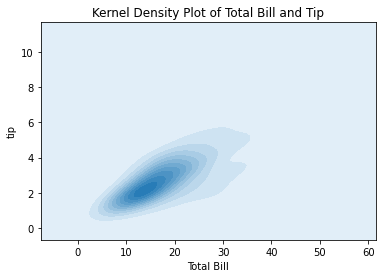

In [10]:
ax = sns.kdeplot(data=tips['total_bill'],data2=tips['tip'],shade=True) # shade will fill in the contours
ax.set_title('Kernel Density Plot of Total Bill and Tip');
ax.set_xlabel('Total Bill');

## 2.5. Box Plot

Text(0, 0.5, 'Total Bill')

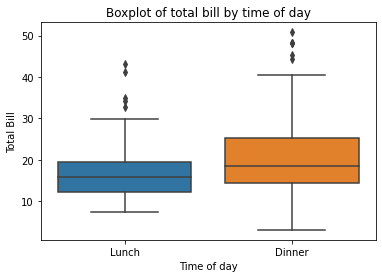

In [11]:
ax = sns.boxplot(x='time', y='total_bill', data=tips)
ax.set_title('Boxplot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

## dinners seem to be more profitable

## 2.6. Violin Plot

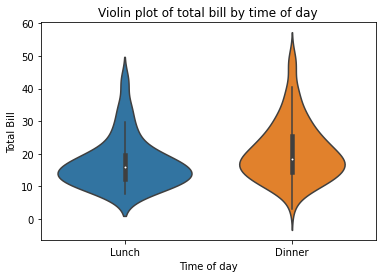

In [12]:
ax = sns.violinplot(x='time', y='total_bill', data=tips)
ax.set_title('Violin plot of total bill by time of day');
ax.set_xlabel('Time of day');
ax.set_ylabel('Total Bill');

## 2.6. Pair Plot

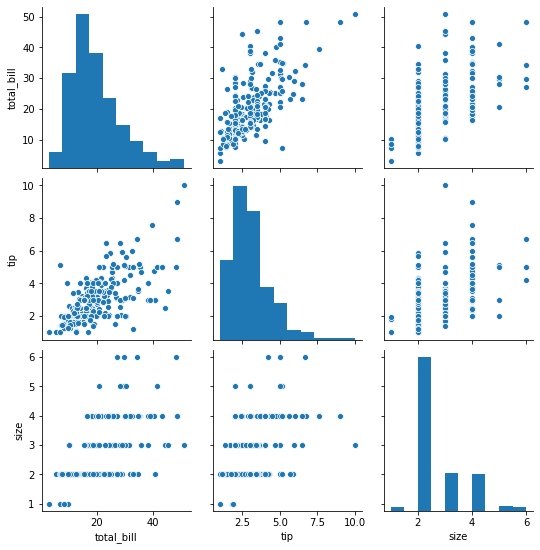

In [13]:
fig = sns.pairplot(tips)

## 2.7. Pair Plot (fancy)

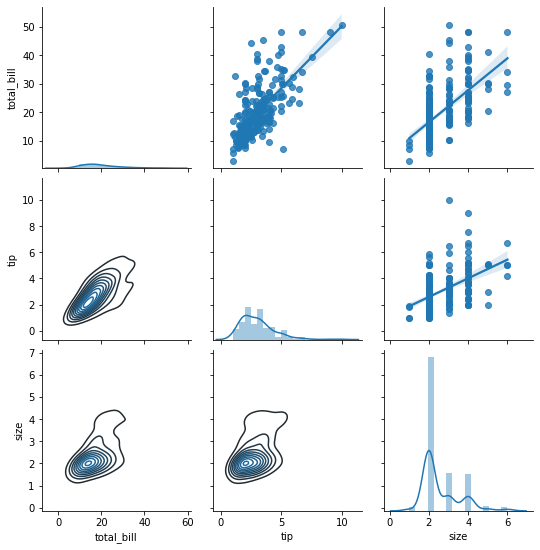

In [14]:
pair_grid = sns.PairGrid(tips)
pair_grid = pair_grid.map_upper(sns.regplot)
pair_grid = pair_grid.map_lower(sns.kdeplot)
pair_grid = pair_grid.map_diag(sns.distplot, rug=False)
plt.show()

# 3. Multivariate plotting

## multivariate plotting is hard and there is no best practice on how to do it, it really depends on the purpose of the visualization

## 3.1. Violin Plots

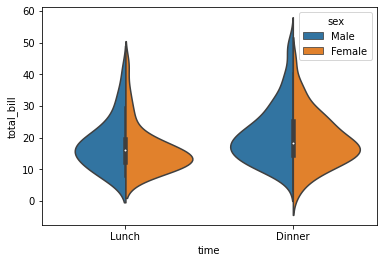

In [15]:
ax = sns.violinplot(x='time', y='total_bill',hue='sex', data=tips,split=True)

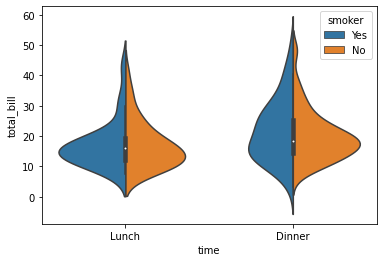

In [16]:
ax = sns.violinplot(x='time', y='total_bill',hue='smoker', data=tips,split=True)

## 3.2. Pair Plots

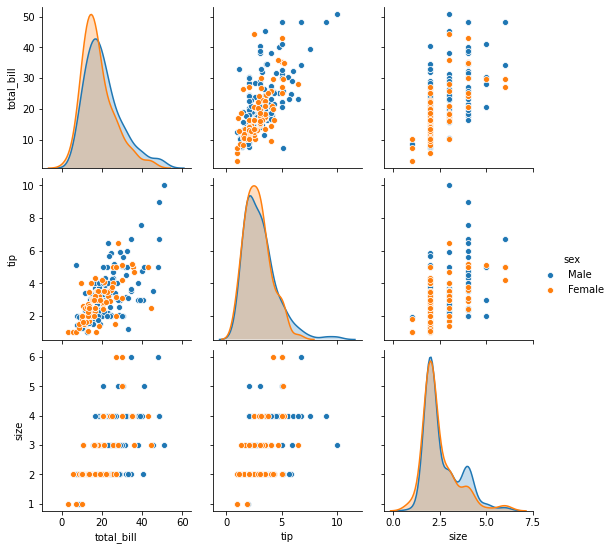

In [17]:
fig = sns.pairplot(tips, hue='sex')

## 3.3. Facet Plots

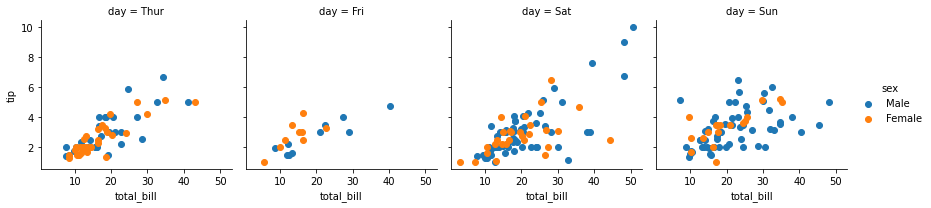

In [18]:
facet = sns.FacetGrid(tips, col='day', hue='sex')
facet = facet.map(plt.scatter, 'total_bill', 'tip')
facet = facet.add_legend()


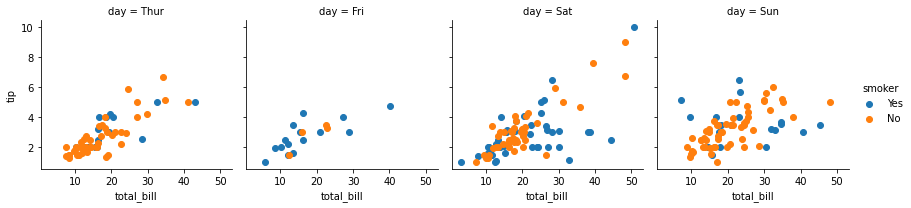

In [19]:
facet = sns.FacetGrid(tips, col='day', hue='smoker')
facet = facet.map(plt.scatter, 'total_bill', 'tip')
facet = facet.add_legend()

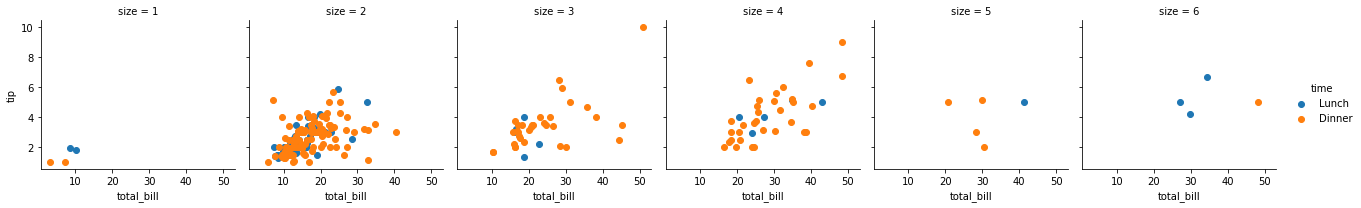

In [20]:
facet = sns.FacetGrid(tips, col='size', hue='time')
facet = facet.map(plt.scatter, 'total_bill', 'tip')
facet = facet.add_legend()